## Cochran's Theorem

$$
\begin{aligned}
\sum_{i=1}^n (Z_i - \bar{Z}_n)^2 & = Z^T P Z \\
& = (Q^T Z)^T D (Q^T Z) \\
& = Y^T D Y  \\
& = (Y_1 \cdots Y_n)^T diag(0,1,...,1)  (Y_1 \cdots Y_n) \\
& \sim \chi^2_{n-1},
\end{aligned}
$$

where:

- $Z=(Z_1, \ldots , Z_n)^T \sim N_n(0,I_n)$
- $\bar{Z}_n = \frac{1}{n} \sum_{i=1}^n Z_i$ is the sample mean
- $P = I - \frac{1}{n} 1 1^T $ is a projection matrix onto the hyperplane where $\sum_{i=1}^n Z_i = 0$,
- $Q = [q_1, q_2, \ldots, q_n]$, where $q_i$ are the eigenvectors of $P$, forming an orthogonal matrix. Q is not unique
- $D = \mathrm{diag}(0, 1, \ldots, 1)$ is a diagonal matrix where the first eigenvalue is $0$ (corresponding to the eigenvector along $ 1^T = [1, 1, \ldots, 1] $ and the others are 1.
- $Y=Q^T Z \sim N_n(0, I_n)$ is a transformed point measured by new axes(y1,y2, y3)


### Geometric Interpretation (n=3)

$$
\sum_{i=1}^n (Z_i - \bar{Z}_n)^2 = Y^T D Y = (DY)^T (DY) = (0 \ Y_2  ... Y_n)^T (0 \ Y_2 ... Y_n)  
$$

This is the squared norm of projected vector $PZ \in R^3$ on the plane.

https://en.wikipedia.org/wiki/Cochran's_theorem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider, IntSlider, widgets

# Define the grid for x and y
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

n = 50
n_dim = 3

# compute eigenvectors and eigenvalues of P
P = np.eye(n_dim) - np.ones((n_dim, n_dim))/ n_dim
eigenval, Q = np.linalg.eigh(P) 
for i in range(Q.shape[1]): 
    if eigenval[i] < 0:
        eigenval[i] *= -1
        Q[:,i] *= -1

index = np.argmin(abs(eigenval)) # find lambda=0
if Q[index,index] < 0: 
    Q[:,index] *= -1 # (1,1,1)/sqrt(3) 
    eigenval[index] *= -1   
    
# Define the plane ax +by +cz=0
a,b,c=1,1,1
Z = (-a*X - b*Y)/c

new_axis1 = Q[:, 0, np.newaxis] * x*2
new_axis2 = Q [:, 1, np.newaxis] * x*2
new_axis3 = Q[:, 2, np.newaxis] * x*2

np.random.seed(42)

def plot_3d(angle_x, angle_y, n=10, diplay_V=True, diplay_PV=True):
    V = np.random.normal(0, 1, size=(n_dim,n))
    PV = P @ V
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the plane
    ax.plot_surface(X, Y, Z, color='lightblue', alpha=0.5, edgecolor='none')

    if diplay_V:
        ax.scatter(*V, color="red", label=f"Original Vectors v", alpha=0.8, s=2)
    if diplay_PV:
        ax.scatter(*PV, color="blue", label=f"Projected vectors Pv", alpha=0.8, s=2)

    # unit eigenvectors of P
    ax.quiver(0,0,0, *Q[:,0], color="green", label="$q_1 $" + f" for $\\lambda$={eigenval[0]:.2f}")
    ax.quiver(0,0,0, *Q[:,1], color="orange", label="$q_2$"+ f" for $\\lambda$={eigenval[1]:.2f}")
    ax.quiver(0,0,0, *Q[:,2], color="c", label="$q_3$"+f" for $\\lambda$={eigenval[2]:.2f}")
    
    # new axes
    ax.plot(*new_axis1, linewidth=0.5, color="k", linestyle="--", label="new axis $y1 (\\parallel q1)$")
    ax.plot(*new_axis2, linewidth=0.5, color="k", linestyle="--", label="new axis $y2 (\\parallel q2)$")
    ax.plot(*new_axis3, linewidth=0.5, color="k", linestyle="--", label="new axis $y3 (\\parallel q3)$")

    # Set labels and title
    ax.set_title("Cochran's theorem tells $\\|PZ\\|^2 = Y_2^2+Y^2_3\\sim \\chi^2_2$", fontsize=14)
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.set_zlabel("z-axis")

    # Set viewing angle
    ax.view_init(elev=angle_x, azim=angle_y)
    ax.axis('equal')
    
    ax.legend()
    plt.show()


# Create sliders for the various parameters
elev_angle_slider = FloatSlider(value=30, min=0, max=90, step=5, description='Elev Angle')
azim_angle_slider = FloatSlider(value=100, min=0, max=360, step=10, description='Azim Angle')

v1_slider = FloatSlider(value=5, min=-10, max=10, step=0.1, description='v1')
v2_slider = FloatSlider(value=5, min=-10, max=10, step=0.1, description='v2')
v3_slider = FloatSlider(value=5, min=-10, max=10, step=0.1, description='v3')

a_slider = FloatSlider(value=1, min=-5, max=5, step=0.1, description='a')
b_slider = FloatSlider(value=1, min=-5, max=5, step=0.1, description='b')
c_slider = FloatSlider(value=-3, min=-5, max=5, step=0.1, description='c')
n_slider = IntSlider(value=10, min=1, max=100, step=1, description='n points')


diplay_V_cb = widgets.Checkbox(
    value=True,
    description='Display original vectors',
    disabled=False,
    indent=False
)

diplay_PV_cb = widgets.Checkbox(
    value=True,
    description='Display projected vectors',
    disabled=False,
    indent=False
)


# Arrange the sliders in the desired layout using HBox and VBox
sliders_layout = widgets.VBox([
    widgets.HBox([elev_angle_slider, azim_angle_slider]),
    widgets.HBox([n_slider]),
    widgets.HBox([diplay_V_cb, diplay_PV_cb])
])


# Create the reset function
def reset_parameters(b):
    # Reset all sliders to their default values
    elev_angle_slider.value = 30
    azim_angle_slider.value = 100
    n_slider.value = 10
    diplay_V_cb.value = True
    diplay_PV_cb.value = True

# Create the reset button
reset_button = widgets.Button(description="Reset")

# Link the reset function to the button's click event
reset_button.on_click(reset_parameters)

# Layout with sliders and reset button
ui = widgets.VBox([
    sliders_layout,  
    reset_button  
])

# Use interact to call the plot function with the sliders
interact(
    plot_3d,
    angle_x=elev_angle_slider,
    angle_y=azim_angle_slider,
    n=n_slider,
    diplay_V=diplay_V_cb, 
    diplay_PV=diplay_PV_cb
)

# Display the UI
display(ui)



interactive(children=(FloatSlider(value=30.0, description='Elev Angle', max=90.0, step=5.0), FloatSlider(value…

## simulation


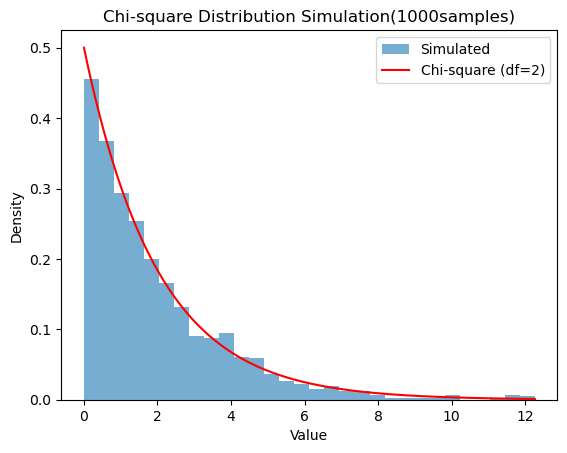

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Parameters
n = 1000  # Number of samples
n_dim = 3  # Dimension
P = np.eye(n_dim) - np.ones((n_dim, n_dim)) / n_dim  # Projection matrix

# Eigen decomposition of P
eigenval, Q = np.linalg.eigh(P)

# Adjust Q if necessary to ensure consistency with (1, 1, 1)/sqrt(3)
index = np.argmin(abs(eigenval))  # Find the eigenvalue closest to 0
if Q[0, index] < 0:  # Ensure eigenvector points in consistent direction
    Q = -Q

# Simulate Gaussian random variables
V = np.random.normal(0, 1, size=(n_dim, n))  # n_dim x n matrix
PV = P @ V  # Apply projection matrix
new_coordinates = Q.T @ PV  # Rotate to new coordinate system

# Compute chi-square random variable
chisqrv = (new_coordinates[1:]**2).sum(axis=0)  # Ignore the first component, since they are 0s

# Plot histogram of the simulated chi-square variable
plt.hist(chisqrv, bins=30, density=True, alpha=0.6, label="Simulated")

# Overlay chi-square PDF
x = np.linspace(0, max(chisqrv), 1000)
plt.plot(x, chi2.pdf(x, df=n_dim-1), label=f"Chi-square (df={n_dim-1})", color='r')

# Add labels and legend
plt.title(f"Chi-square Distribution Simulation({n}samples)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()
